In [50]:
import pandas as pd
import vaex
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Time Analysis
In this chapter we want to analyze possible time patterns of trips. Meaning how many trips there are and when these take place.

In [2]:
df_trips = vaex.open('./data/trips_prepared.hdf5')

In [3]:
df_trips.head()

#,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_start_hour,trip_end_hour,trip_start_4h_period,trip_end_4h_period
0,1b545d0be27b195076e5d2a7d4fc0ebef6ef20ac,'56a1119c6ca57e39525cf06829f9ecff553cf4b5ac24821...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,240,1.3,1.70318e+10,1.70318e+10,32,28,6.25,0,0,0,6.25,Cash,Taxi Affiliation Services,41.881,-87.6327,41.8853,-87.6572,0,0,0,0
1,c3ee40051c5643c54064a8b9df3686d2d411518d,'7987cfe5e3b2c9869665f70fe35dbe7423e7fc5852f2d6f...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,1500,0.4,1.70318e+10,1.70311e+10,32,8,22.75,4.85,0,1.5,29.1,Credit Card,Blue Ribbon Taxi Association Inc.,41.881,-87.6327,41.8983,-87.6208,0,0,0,0
2,29f30c8a6bbc028f5d63aa18c708d31b47267a9f,'0b269137bd94b55212311226d9e1554423e12bcc16a432c...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1620,0.9,1.70318e+10,1.70311e+10,32,8,12.25,2.85,0,2,17.1,Credit Card,Taxi Affiliation Services,41.881,-87.6327,41.8925,-87.6262,0,0,0,0
3,55ae4fa955e6bc8705b995248c34f4183d848c27,'d1d781b6807176ed53fbb9d0010dd0a87e29c073984bda6...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,540,1,1.70311e+10,1.70311e+10,8,8,6.75,0,0,2,8.75,Cash,Dispatch Taxi Affiliation,41.9028,-87.6261,41.8909,-87.6189,0,0,0,0
4,ce908cd441e28d08dfb22bf168102beabb5e16e4,'f7630edc68a131c4a97382dd93206949da80ec1443d8da7...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,480,0.5,1.70311e+10,1.70311e+10,8,8,6.25,2,0,1.5,9.75,Credit Card,Taxi Affiliation Services,41.8925,-87.6262,41.8909,-87.6189,0,0,0,0
5,fd25560e18dab95225999c264586a331dc3283f5,'9ff153898c75dbd960a207b660a71f92f79b666dcec98e1...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1980,3.4,1.70318e+10,1.70311e+10,32,8,16.75,3.65,0,1.5,21.9,Credit Card,Taxi Affiliation Services,41.881,-87.6327,41.895,-87.6197,0,0,0,0
6,2504e0bf058ff310ac4c197618a843f88fc1c0c6,'d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155fa...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,960,5.9,1.70313e+10,1.70311e+10,32,6,17.5,0,0,1,18.5,Cash,Northwest Management LLC,41.8774,-87.622,41.9427,-87.6518,0,0,0,0
7,4ca1087133dfd8bde2483cb2aaa609fff2654f7c,'0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4a...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,780,0.1,1.70312e+10,1.70311e+10,24,8,9.5,2.1,0,1,12.6,Credit Card,Taxi Affiliation Services,41.8997,-87.665,41.892,-87.6319,0,0,0,0
8,04bc3089a41c33afc9b6cbf5a9beac4fed91da7c,'785ef52cff80fe78a7ee899453036c0be6ac8fef4d10068...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,120,0.4,1.70318e+10,1.70318e+10,32,32,4.25,2,0,1,7.25,Credit Card,Chicago Medallion Leasing INC,41.881,-87.6327,41.881,-87.6327,0,0,0,0
9,e09945909ae154d6b0ce433468baddcf79f79973,'b329626db30d23db0e6620de7d1a3036dd3c2ca3e139fd4...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,180,0.7,1.70318e+10,1.70318e+10,32,28,5,0,0,2,7,Cash,Dispatch Taxi Affiliation,41.881,-87.6327,41.8853,-87.6572,0,0,0,0


In [4]:
df_trips['trip_start_timestamp'] = df_trips['trip_start_timestamp'].astype('datetime64')
df_trips['trip_start_date'] = df_trips['trip_start_timestamp'].dt.date

In [5]:
weather_df = vaex.from_csv('./data/weather_data_final.csv')

In [6]:
weather_df['date_time'] = weather_df['date_time'].astype('datetime64')

In [7]:
weather_df.head()

#,date,time,temp,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,date_time
0,2017-01-01,00:53,33 °F,24 °F,70 °%,8 °mph,0 °mph,29.45 °in,0.0 °in,Partly Cloudy,2017-01-01 00:53:00
1,2017-01-01,01:53,25 °F,18 °F,75 °%,3 °mph,0 °mph,29.33 °in,0.0 °in,Fair,2017-01-01 01:53:00
2,2017-01-01,02:53,25 °F,18 °F,75 °%,0 °mph,0 °mph,29.34 °in,0.0 °in,Fair,2017-01-01 02:53:00
3,2017-01-01,03:53,25 °F,19 °F,78 °%,5 °mph,0 °mph,29.36 °in,0.0 °in,Fair,2017-01-01 03:53:00
4,2017-01-01,04:53,24 °F,18 °F,77 °%,7 °mph,0 °mph,29.37 °in,0.0 °in,Fair,2017-01-01 04:53:00
5,2017-01-01,05:53,22 °F,17 °F,82 °%,6 °mph,0 °mph,29.39 °in,0.0 °in,Fair,2017-01-01 05:53:00
6,2017-01-01,06:53,22 °F,17 °F,82 °%,7 °mph,0 °mph,29.41 °in,0.0 °in,Cloudy,2017-01-01 06:53:00
7,2017-01-01,07:53,22 °F,17 °F,82 °%,8 °mph,0 °mph,29.43 °in,0.0 °in,Cloudy,2017-01-01 07:53:00
8,2017-01-01,08:53,22 °F,17 °F,82 °%,5 °mph,0 °mph,29.44 °in,0.0 °in,Cloudy,2017-01-01 08:53:00
9,2017-01-01,09:53,26 °F,20 °F,78 °%,3 °mph,0 °mph,29.45 °in,0.0 °in,Fair,2017-01-01 09:53:00


## 2.1 Average Trip Durations

## 2.1.1 Average Trips Durations over Year

In [8]:
df_trips.head()

#,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_start_hour,trip_end_hour,trip_start_4h_period,trip_end_4h_period,trip_start_date
0,1b545d0be27b195076e5d2a7d4fc0ebef6ef20ac,'56a1119c6ca57e39525cf06829f9ecff553cf4b5ac24821...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,240,1.3,1.70318e+10,1.70318e+10,32,28,6.25,0,0,0,6.25,Cash,Taxi Affiliation Services,41.881,-87.6327,41.8853,-87.6572,0,0,0,0,2017-01-01
1,c3ee40051c5643c54064a8b9df3686d2d411518d,'7987cfe5e3b2c9869665f70fe35dbe7423e7fc5852f2d6f...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,1500,0.4,1.70318e+10,1.70311e+10,32,8,22.75,4.85,0,1.5,29.1,Credit Card,Blue Ribbon Taxi Association Inc.,41.881,-87.6327,41.8983,-87.6208,0,0,0,0,2017-01-01
2,29f30c8a6bbc028f5d63aa18c708d31b47267a9f,'0b269137bd94b55212311226d9e1554423e12bcc16a432c...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1620,0.9,1.70318e+10,1.70311e+10,32,8,12.25,2.85,0,2,17.1,Credit Card,Taxi Affiliation Services,41.881,-87.6327,41.8925,-87.6262,0,0,0,0,2017-01-01
3,55ae4fa955e6bc8705b995248c34f4183d848c27,'d1d781b6807176ed53fbb9d0010dd0a87e29c073984bda6...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,540,1,1.70311e+10,1.70311e+10,8,8,6.75,0,0,2,8.75,Cash,Dispatch Taxi Affiliation,41.9028,-87.6261,41.8909,-87.6189,0,0,0,0,2017-01-01
4,ce908cd441e28d08dfb22bf168102beabb5e16e4,'f7630edc68a131c4a97382dd93206949da80ec1443d8da7...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,480,0.5,1.70311e+10,1.70311e+10,8,8,6.25,2,0,1.5,9.75,Credit Card,Taxi Affiliation Services,41.8925,-87.6262,41.8909,-87.6189,0,0,0,0,2017-01-01
5,fd25560e18dab95225999c264586a331dc3283f5,'9ff153898c75dbd960a207b660a71f92f79b666dcec98e1...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1980,3.4,1.70318e+10,1.70311e+10,32,8,16.75,3.65,0,1.5,21.9,Credit Card,Taxi Affiliation Services,41.881,-87.6327,41.895,-87.6197,0,0,0,0,2017-01-01
6,2504e0bf058ff310ac4c197618a843f88fc1c0c6,'d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155fa...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,960,5.9,1.70313e+10,1.70311e+10,32,6,17.5,0,0,1,18.5,Cash,Northwest Management LLC,41.8774,-87.622,41.9427,-87.6518,0,0,0,0,2017-01-01
7,4ca1087133dfd8bde2483cb2aaa609fff2654f7c,'0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4a...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,780,0.1,1.70312e+10,1.70311e+10,24,8,9.5,2.1,0,1,12.6,Credit Card,Taxi Affiliation Services,41.8997,-87.665,41.892,-87.6319,0,0,0,0,2017-01-01
8,04bc3089a41c33afc9b6cbf5a9beac4fed91da7c,'785ef52cff80fe78a7ee899453036c0be6ac8fef4d10068...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,120,0.4,1.70318e+10,1.70318e+10,32,32,4.25,2,0,1,7.25,Credit Card,Chicago Medallion Leasing INC,41.881,-87.6327,41.881,-87.6327,0,0,0,0,2017-01-01
9,e09945909ae154d6b0ce433468baddcf79f79973,'b329626db30d23db0e6620de7d1a3036dd3c2ca3e139fd4...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,180,0.7,1.70318e+10,1.70318e+10,32,28,5,0,0,2,7,Cash,Dispatch Taxi Affiliation,41.881,-87.6327,41.8853,-87.6572,0,0,0,0,2017-01-01


In [9]:
avg_duration_year = df_trips.groupby(by='trip_start_date').agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')}) 

In [10]:
avg_duration_year = avg_duration_year.sort('trip_start_date')
avg_duration_year = avg_duration_year.to_pandas_df()
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,657.304753
1,2017-01-02,697.252965
2,2017-01-03,647.909524
3,2017-01-04,646.480655
4,2017-01-05,730.730918


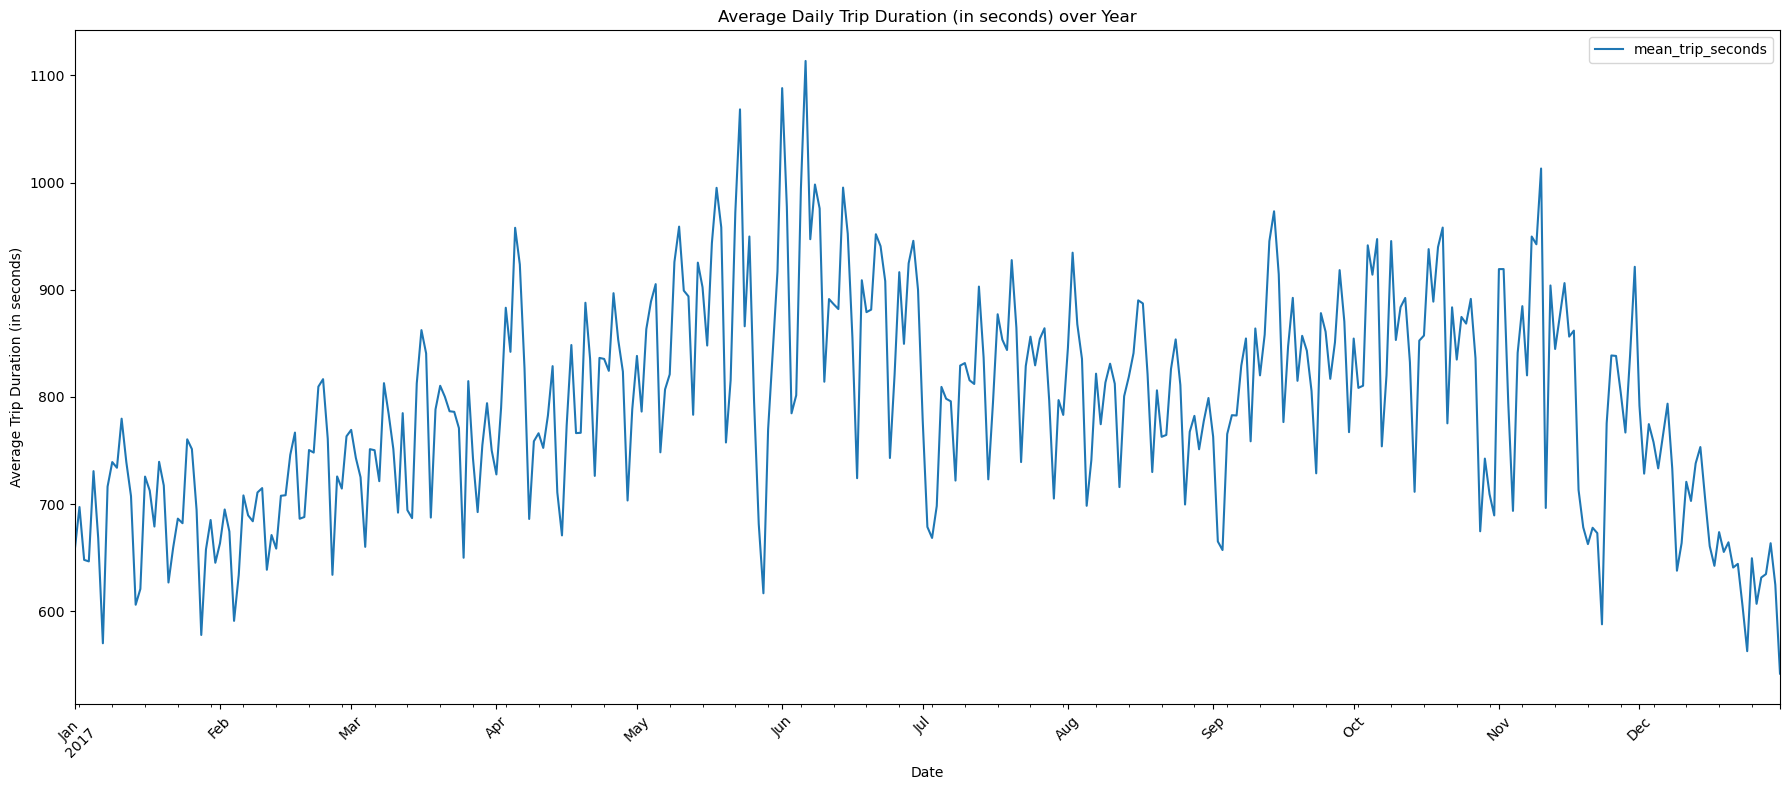

In [11]:
avg_duration_year.plot(x='trip_start_date', y='mean_trip_seconds', kind='line', figsize=(18,8)) 
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (in seconds)')
plt.title('Average Daily Trip Duration (in seconds) over Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.1.1.1 Impact of Environmental Metrics

In [12]:
#removing any types of units from the features, allowing for easier calculations

weather_prep = weather_df.copy()
weather_prep = weather_prep.to_pandas_df()
#rename column to make merge with duration data easier
weather_prep['trip_start_date'] = pd.to_datetime(weather_prep['date_time'].dt.date)
weather_prep = weather_prep.drop('date', axis = 1)
weather_prep['date'] = pd.to_datetime(weather_prep['date_time'])
weather_prep['temp'] = weather_prep.loc[:, 'temp'].astype(str)
weather_prep.loc[:,'temp'] = weather_prep['temp'].astype(str).str.strip(' °F').astype(float)
weather_prep.loc[:,'dew_point'] = weather_prep['dew_point'].astype(str).str.strip(' °F').astype(float)
weather_prep.loc[:,'humidity'] = weather_prep['humidity'].astype(str).str.strip(' °%').astype(float)
weather_prep.loc[:,'wind_speed'] = weather_prep['wind_speed'].astype(str).str.strip(' °mph').astype(float)
weather_prep.loc[:,'wind_gust'] = weather_prep['wind_gust'].astype(str).str.strip(' °mph').astype(float)
weather_prep.loc[:,'pressure'] = weather_prep['pressure'].astype(str).str.strip(' °in').astype(float)
weather_prep.loc[:,'precip'] = weather_prep['precip'].astype(str).str.strip(' °in').astype(float)
conditions_map = {"Fair": 0, "Mostly Cloudy": 1,"Partly Cloudy": 2, "Cloudy": 3,"Light Rain": 4,"Thunder": 5}
weather_prep['condition_map'] = weather_prep['condition'].map(conditions_map)
weather_prep['condition_map'] = weather_prep['condition_map'].astype(float)

In [20]:
duration_weather_year = pd.merge(avg_duration_year, weather_prep, on='trip_start_date', how='outer')
duration_weather_year = duration_weather_year.drop(['date_time','date','condition'], axis = 1)

In [40]:
list_features = ['mean_trip_seconds','temp','dew_point','humidity','wind_speed','wind_gust','pressure','precip','condition_map']
duration_weather_year = duration_weather_year.groupby(['trip_start_date'])[list_features].mean().reset_index()
duration_weather_year['condition_map'] = duration_weather_year['condition_map'].apply(lambda x: round(x,0))

In [41]:
duration_weather_year.head()

,trip_start_date,mean_trip_seconds,temp,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition_map
0,2017-01-01,657.304753,31.291667,19.666667,63.958333,5.625000,0.000000,29.437083,0.0,1.0
1,2017-01-02,697.252965,37.541667,32.375000,81.916667,6.833333,0.000000,29.353333,0.0,2.0
2,2017-01-03,647.909524,37.458333,33.166667,84.791667,9.750000,6.166667,29.147917,0.0,3.0
3,2017-01-04,646.480655,14.750000,1.625000,56.750000,15.666667,15.125000,29.352500,0.0,1.0
4,2017-01-05,730.730918,9.791667,-3.125000,56.166667,12.083333,4.583333,29.388333,0.0,1.0


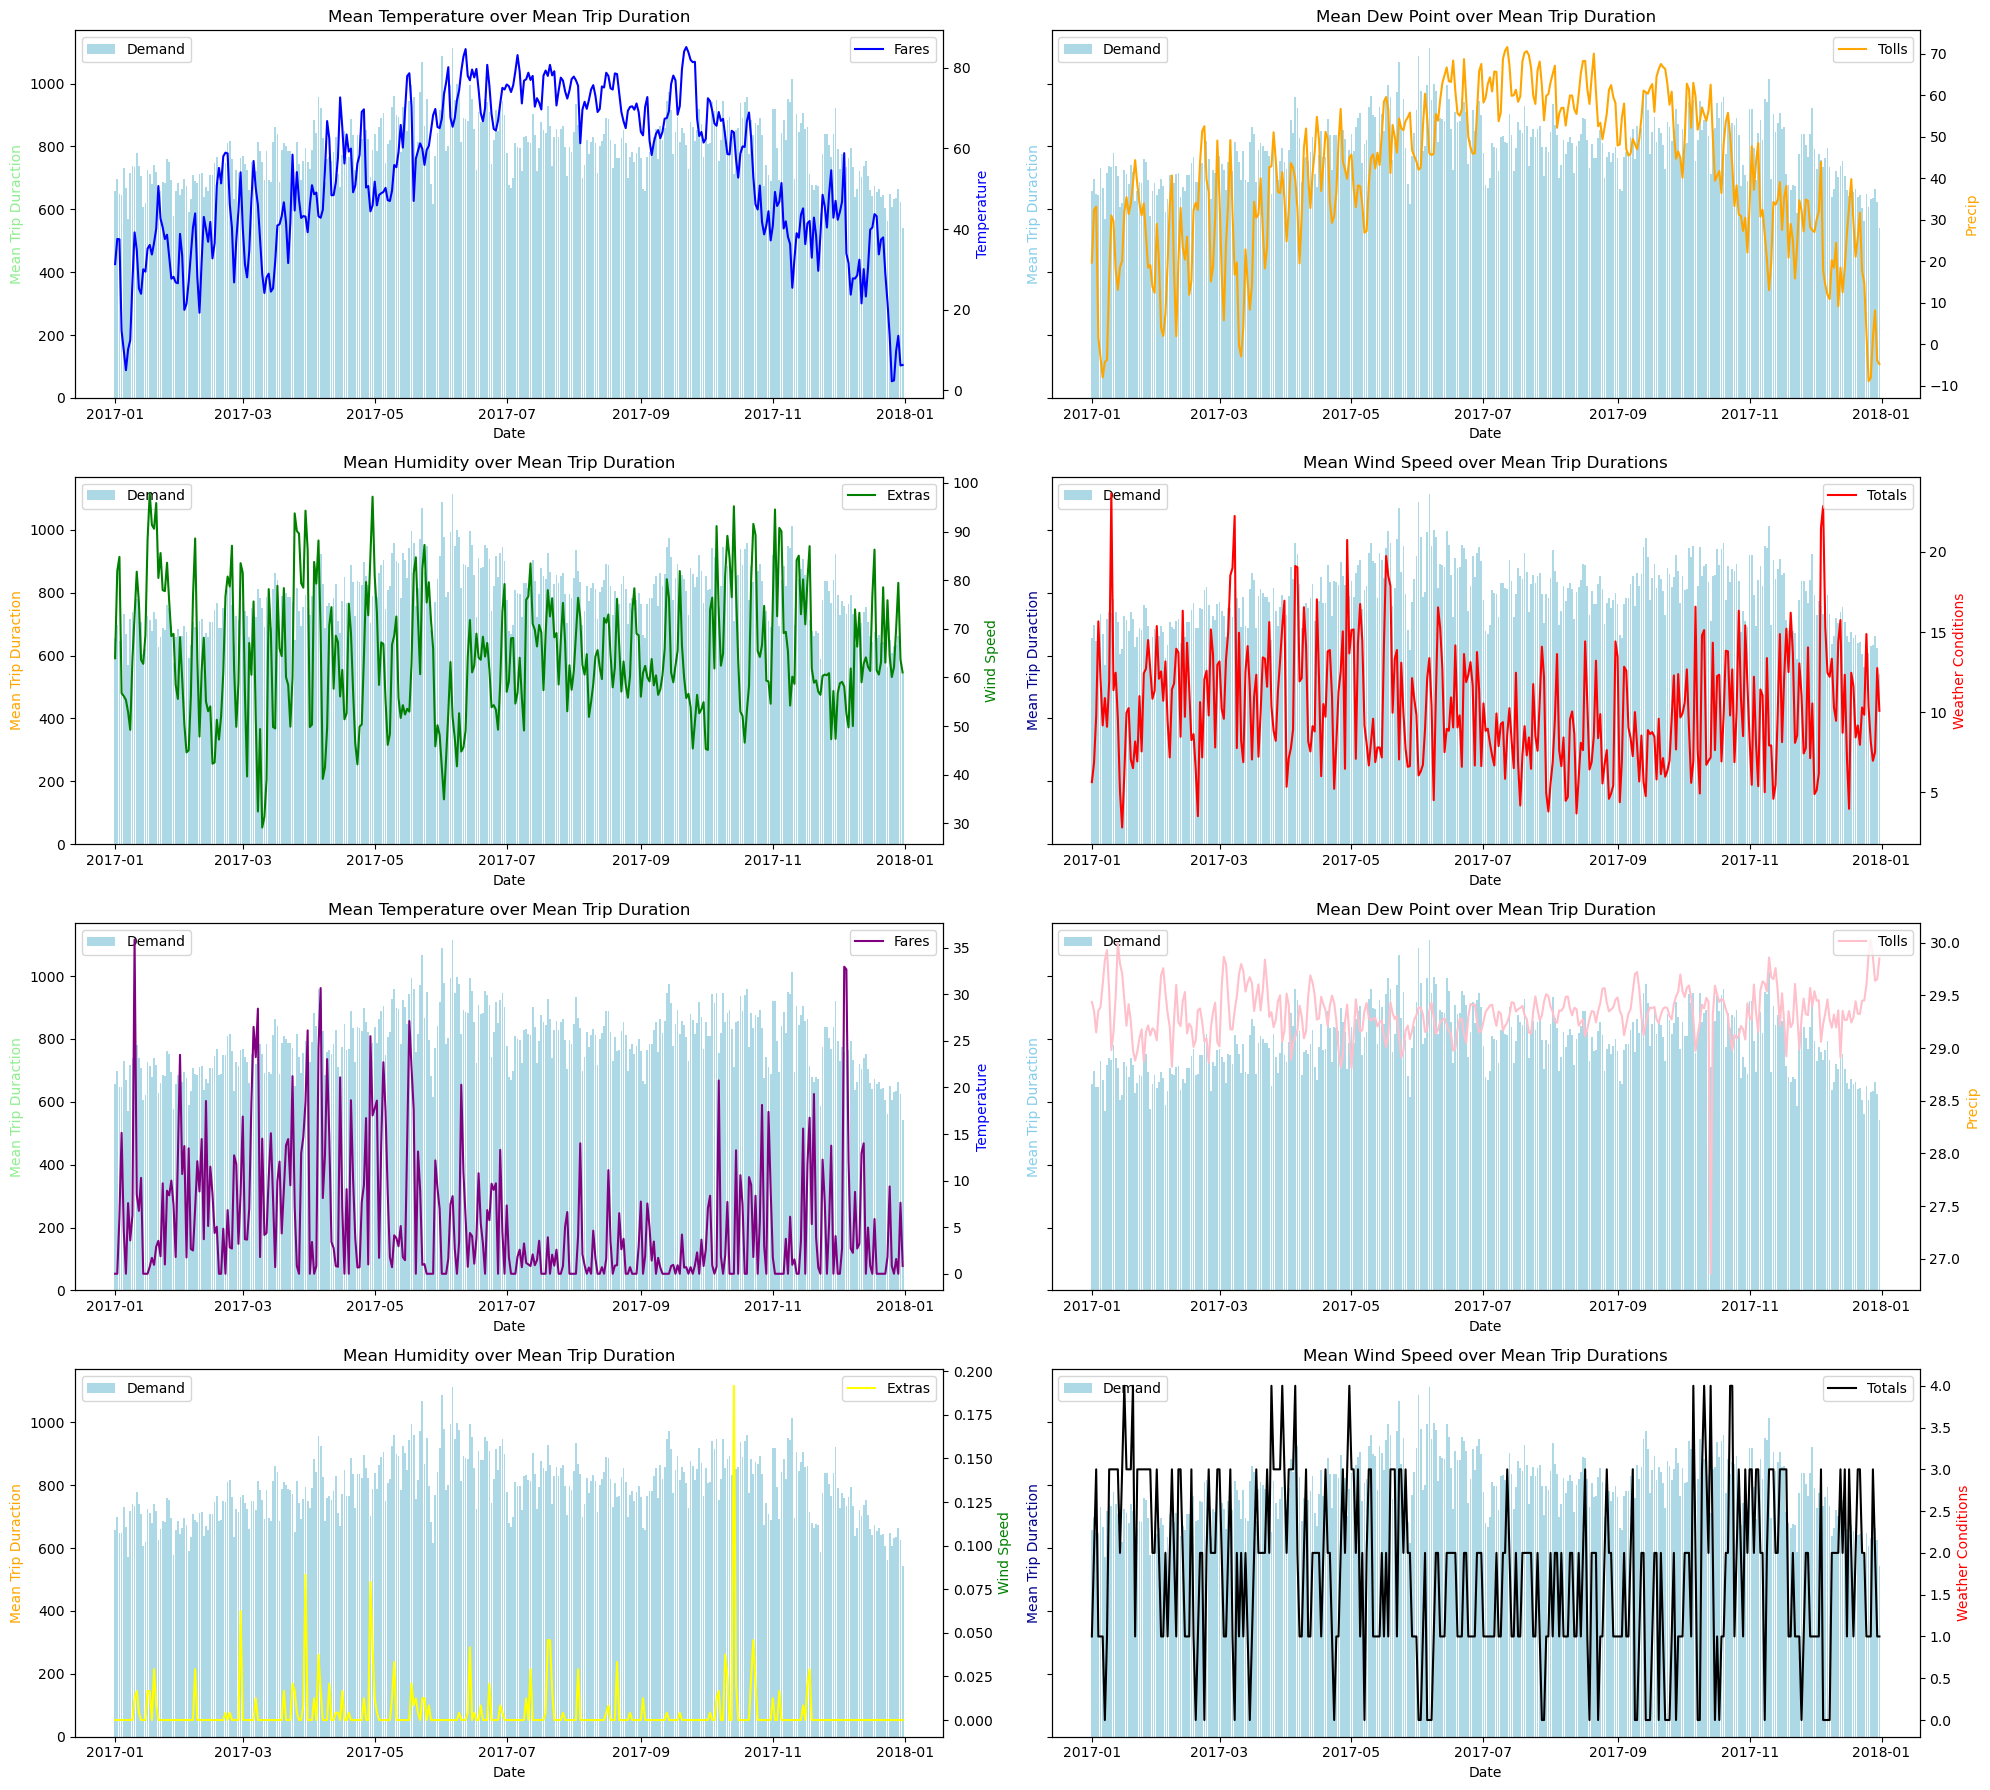

In [42]:
fig, axs = plt.subplots(4, 2, figsize=(20, 18), sharey=True)

# Plot for Temperature
ax1 = axs[0, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['temp'], color='blue', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Dew Point
ax1 = axs[0, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['dew_point'], color='orange', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Humidity
ax1 = axs[1, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['humidity'], color='green', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Speed
ax1 = axs[1, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['wind_speed'], color='red', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Gust
ax1 = axs[2, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['wind_gust'], color='purple', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Pressure
ax1 = axs[2, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['pressure'], color='pink', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Precip
ax1 = axs[3, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['precip'], color='yellow', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Condition Map
ax1 = axs[3, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['condition_map'], color='black', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

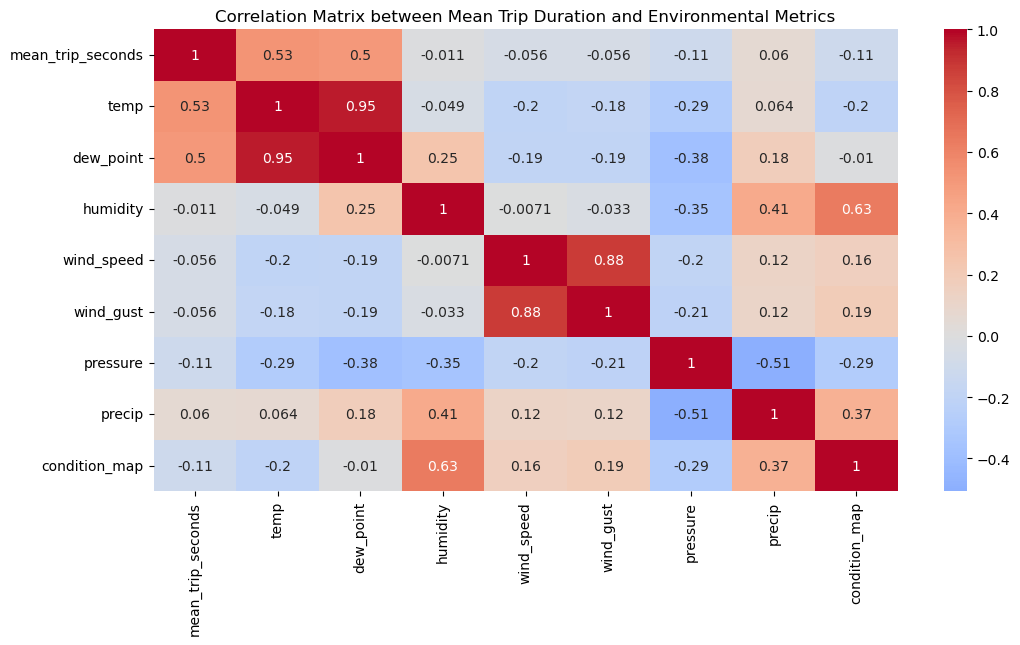

In [47]:
corr_matrix = duration_weather_year.corr()
#visualize correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Environmental Metrics')
plt.show()

## 2.1.1.2 Impact Weekends & Holidays

In [48]:
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,657.304753
1,2017-01-02,697.252965
2,2017-01-03,647.909524
3,2017-01-04,646.480655
4,2017-01-05,730.730918


In [62]:
weekend_holiday_prep = avg_duration_year.copy()
weekend_holiday_prep['trip_start_date'] = pd.to_datetime(weekend_holiday_prep['trip_start_date'].dt.date)
holiday_strings = ["01.01.2017", "02.01.2017", "16.01.2017", "20.01.2017", "20.02.2017", "29.05.2017",
    "04.07.2017", "04.09.2017", "09.10.2017", "10.11.2017", "11.11.2017", "23.11.2017", "25.11.2017"]
date_format = "%d.%m.%Y"
holidays = [datetime.strptime(date, date_format) for date in holiday_strings]

def isHoliday(date):
    return date in holidays

weekend_holiday_prep['isHoliday'] = weekend_holiday_prep['trip_start_date'].apply(isHoliday)
weekend_holiday_prep['isWeekend'] = weekend_holiday_prep['trip_start_date'].dt.dayofweek >= 5

In [63]:
weekend_holiday_prep

,trip_start_date,mean_trip_seconds,isHoliday,isWeekend
0,2017-01-01,657.304753,True,True
1,2017-01-02,697.252965,True,False
2,2017-01-03,647.909524,False,False
3,2017-01-04,646.480655,False,False
4,2017-01-05,730.730918,False,False
...,...,...,...,...
360,2017-12-27,631.411459,False,False
361,2017-12-28,634.639932,False,False
362,2017-12-29,663.446559,False,False
363,2017-12-30,624.572620,False,True


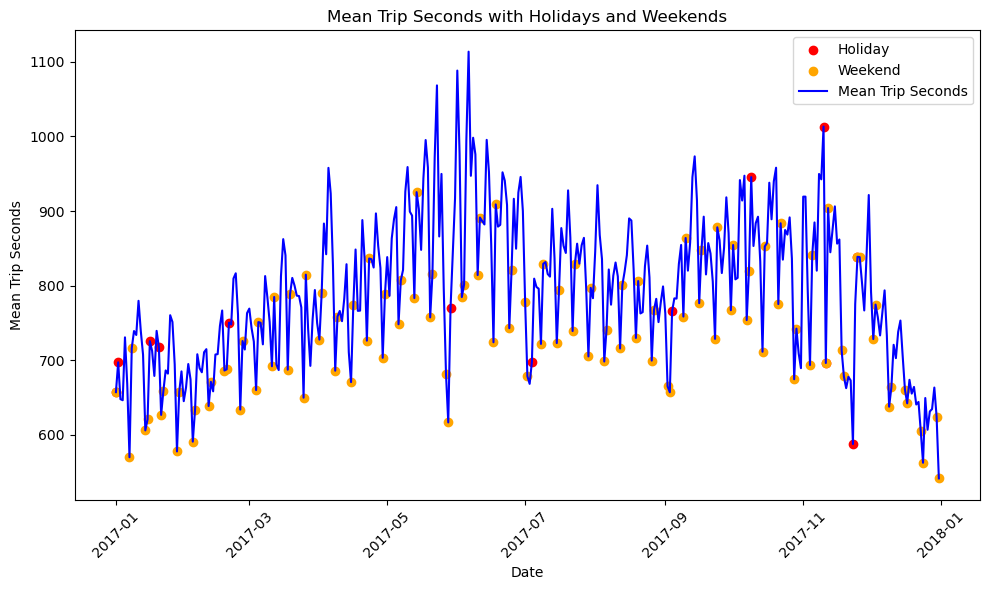

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(weekend_holiday_prep[weekend_holiday_prep['isHoliday']]['trip_start_date'], weekend_holiday_prep[weekend_holiday_prep['isHoliday']]['mean_trip_seconds'], color='r', label='Holiday')
plt.scatter(weekend_holiday_prep[weekend_holiday_prep['isWeekend']]['trip_start_date'], weekend_holiday_prep[weekend_holiday_prep['isWeekend']]['mean_trip_seconds'], color='orange', label='Weekend')
plt.plot(weekend_holiday_prep['trip_start_date'], weekend_holiday_prep['mean_trip_seconds'], linestyle='-', color='b', label='Mean Trip Seconds')
plt.xlabel('Date')
plt.ylabel('Mean Trip Seconds')
plt.title('Mean Trip Seconds with Holidays and Weekends')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

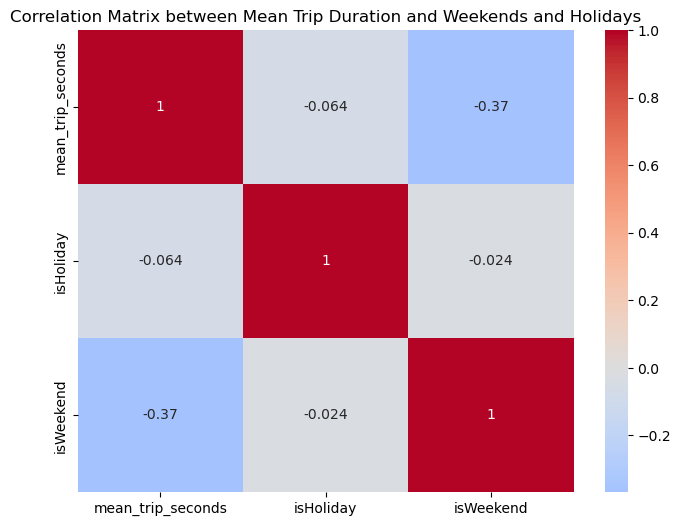

In [71]:
corr_matrix = weekend_holiday_prep.corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Weekends and Holidays')
plt.show()

## 2.1.1.3 Impact of Months and Seasons

In [73]:
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,657.304753
1,2017-01-02,697.252965
2,2017-01-03,647.909524
3,2017-01-04,646.480655
4,2017-01-05,730.730918


In [77]:
month_season_prep = avg_duration_year.copy()

month_season_prep['month'] = month_season_prep['trip_start_date'].dt.month
months_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_season_prep['month_name'] = month_season_prep['month'].map(months_map)

seasons_name_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
season_map = 1: 4, 2: 4, 3: 1, 4: 1, 5: 1,6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 4}
month_season_prep['season'] = month_season_prep['trip_start_date'].dt.month.map(seasons_name_map)

In [92]:
month_season_prep.head()

,trip_start_date,mean_trip_seconds,month,month_name,season
0,2017-01-01,657.304753,1,January,Winter
1,2017-01-02,697.252965,1,January,Winter
2,2017-01-03,647.909524,1,January,Winter
3,2017-01-04,646.480655,1,January,Winter
4,2017-01-05,730.730918,1,January,Winter


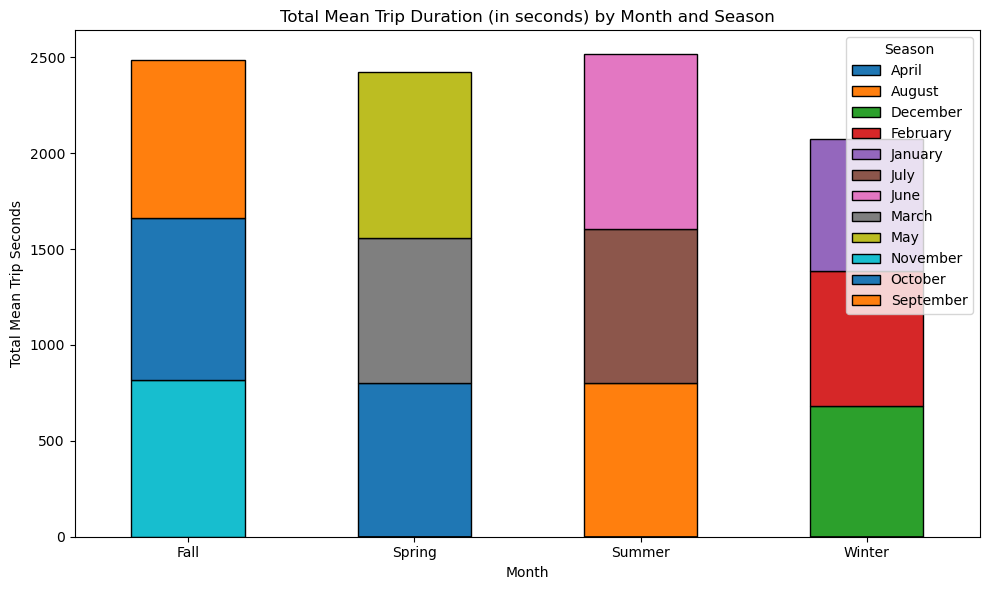

In [101]:
grouped_months_season = month_season_prep.groupby(['season', 'month_name'])['mean_trip_seconds'].mean().unstack()

ax = grouped_months_season.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Total Mean Trip Seconds')
ax.set_title('Total Mean Trip Duration (in seconds) by Month and Season')
plt.xticks(rotation=0)
plt.legend(title='Season')

plt.tight_layout()
plt.show()

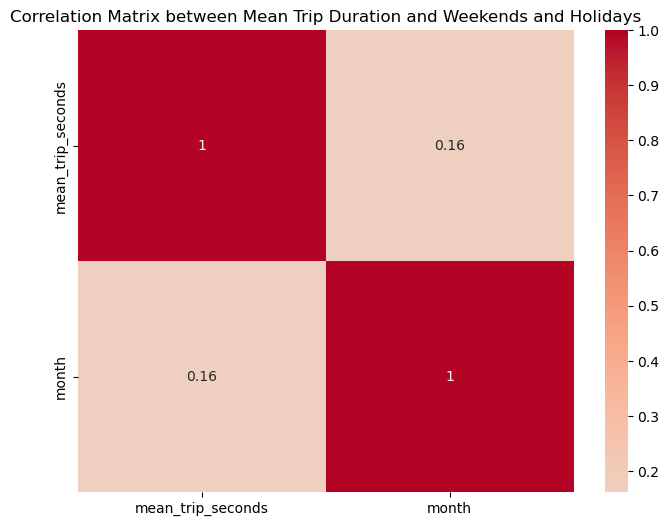

In [93]:
corr_matrix = month_season_prep.corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Weekends and Holidays')
plt.show()

## 2.1.1.4 Impact of Weekdays

In [97]:
weekday_prep = avg_duration_year.copy()
weekday_prep['weekday'] = weekday_prep['trip_start_date'].dt.dayofweek

In [98]:
weekday_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
weekday_prep['weekday_name'] = weekday_prep['weekday'].apply(lambda x: weekday_names[x])

In [105]:
grouped_weekday = weekday_prep.groupby(['weekday_name'])['mean_trip_seconds'].mean().reset_index()

In [108]:
grouped_weekday.head()

,weekday_name,mean_trip_seconds
0,Friday,812.443647
1,Monday,795.575372
2,Saturday,701.756234
3,Sunday,765.901788
4,Thursday,846.799842


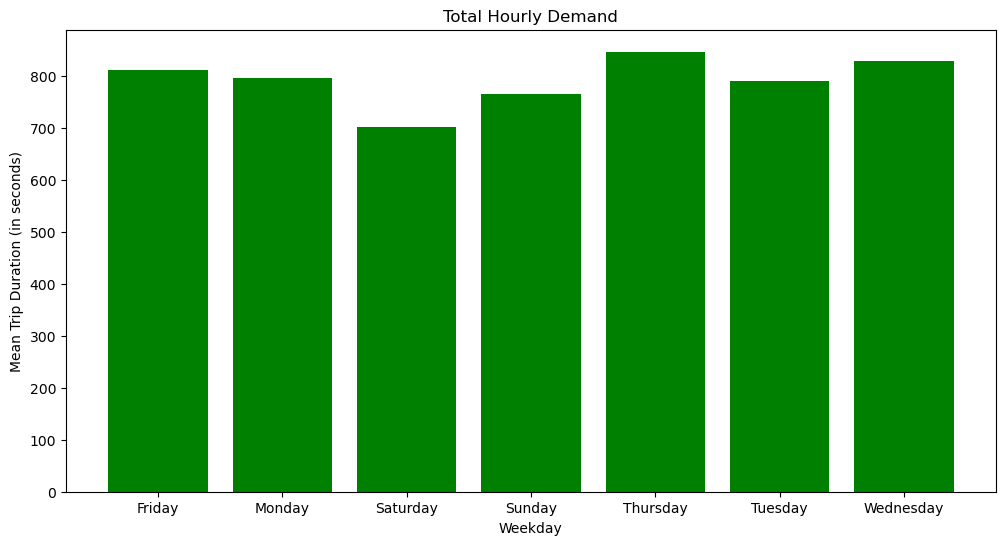

In [113]:
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_weekday['weekday_name'], grouped_weekday['mean_trip_seconds'], color='green')
plt.xlabel('Weekday')
plt.ylabel('Mean Trip Duration (in seconds)')
plt.title('Total Hourly Demand')
plt.show()

## 2.1.2 Average Hourly Trip Durations

In [16]:
trip_duration_hourly = df_trips.groupby(by='trip_start_hour').agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')}) 

In [17]:
trip_duration_hourly = trip_duration_hourly.sort('trip_start_hour')
trip_duration_hourly = trip_duration_hourly.to_pandas_df()
trip_duration_hourly.head()

,trip_start_hour,mean_trip_seconds
0,0,589.192974
1,1,538.502864
2,2,503.768009
3,3,515.470861
4,4,644.486188


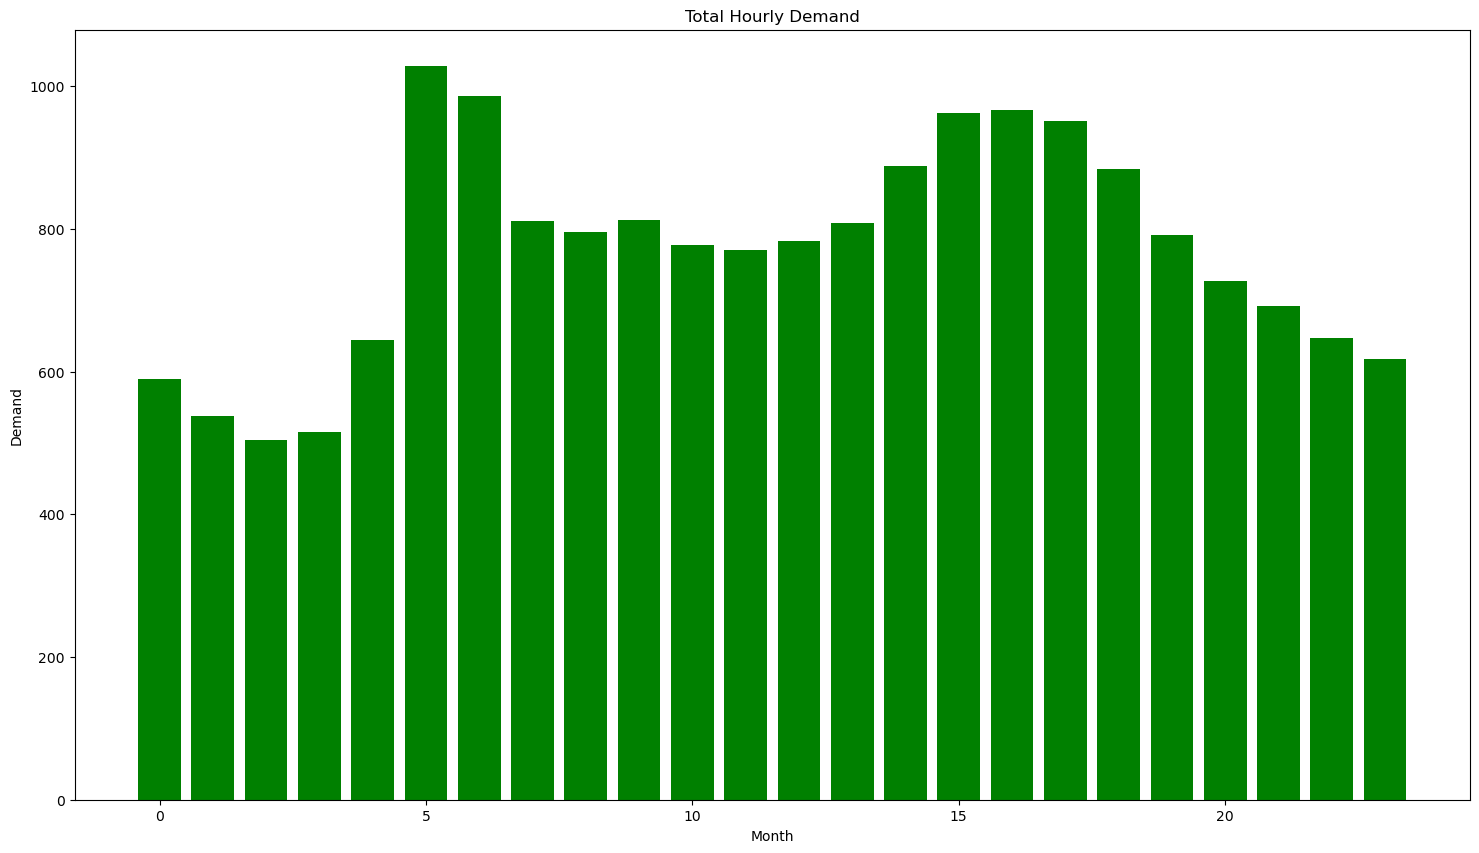

In [94]:
plt.figure(figsize=(18, 10))
bars = plt.bar(trip_duration_hourly['trip_start_hour'], trip_duration_hourly['mean_trip_seconds'], color='green')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Total Hourly Demand')
plt.show()